<a href="https://colab.research.google.com/github/leojkn/Projeto_leonardo/blob/Projeto-Impacta-Oficial/Trabalho_oficial_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scipy

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor

from sklearn.decomposition import PCA, KernelPCA

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
caminho_do_arquivo = '/content/drive/My Drive/forest fire.csv'
df = pd.read_csv(caminho_do_arquivo, encoding='ISO-8859-1', delimiter=';')
df.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


In [7]:
df.describe(include="O")

,month,day
count,517,517
unique,12,7
top,aug,sun
freq,184,95


In [8]:
month_mapping = {
    'mar': 3, 'oct': 10, 'aug': 8, 'sep': 9, 'apr': 4, 'jun': 6, 'jul': 7,
    'feb': 2, 'jan': 1, 'dec': 12, 'may': 5, 'nov': 11
}

In [9]:
df['month'] = df['month'].map(month_mapping)

In [10]:
day_mapping = {
    'fri': 4, 'tue': 2, 'sat': 5, 'sun': 6, 'mon': 0, 'wed': 3, 'thu': 1
}

In [11]:
df['day'] = df['day'].map(day_mapping)

In [12]:
# Calcular a matriz de correlação
corr_matrix = df.corr()

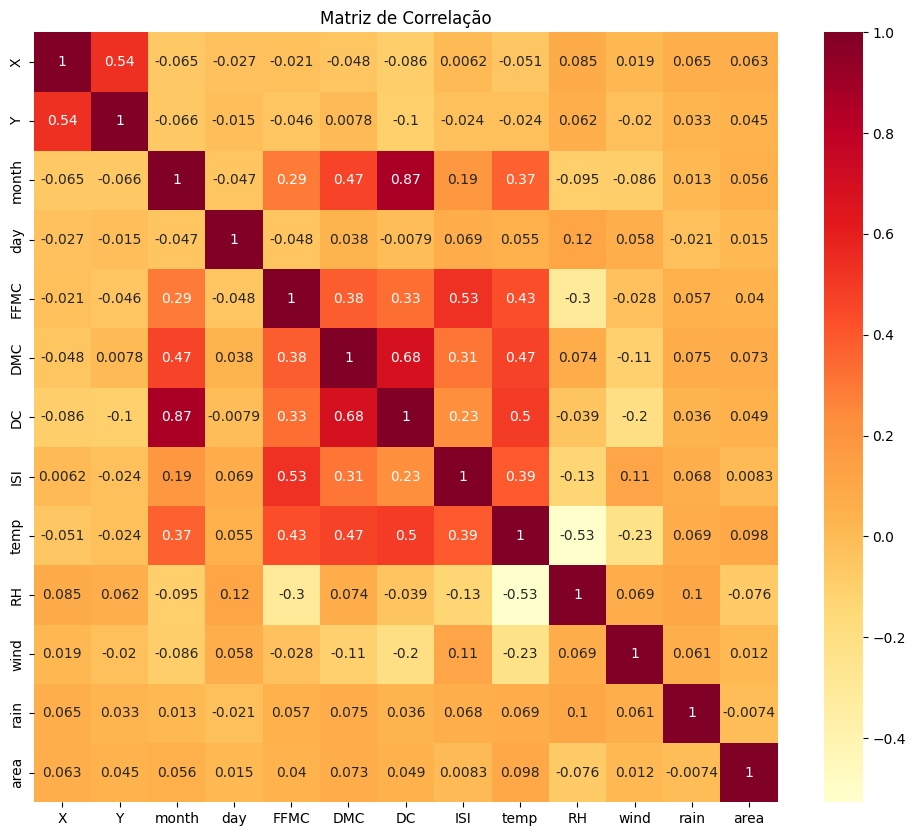

In [13]:
# Criar o gráfico de matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Matriz de Correlação')
plt.show()

In [14]:
# Crie uma lista com as colunas que você deseja plotar
columns = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']


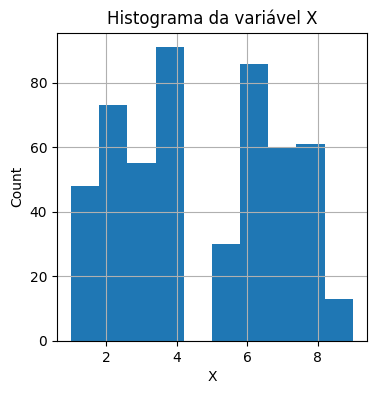

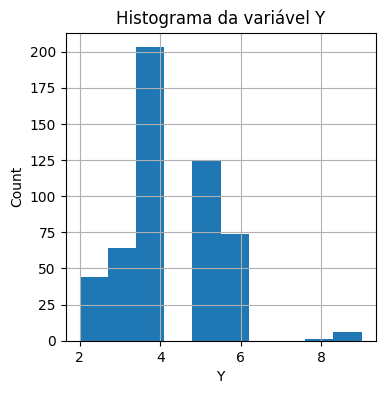

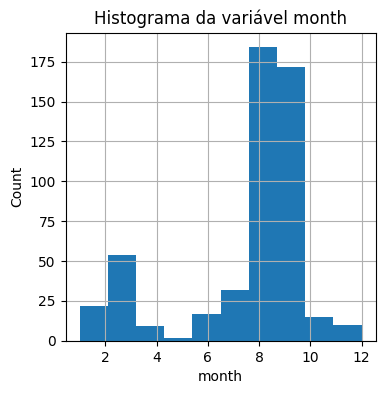

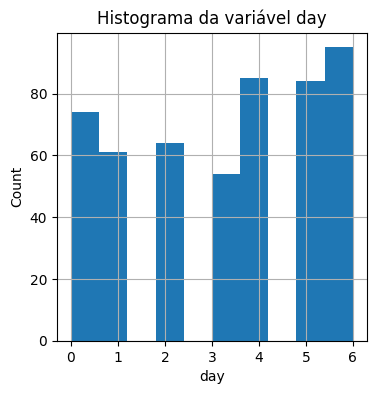

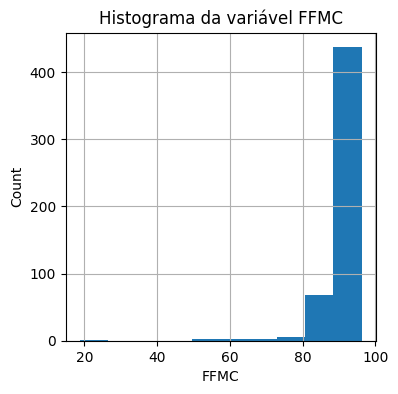

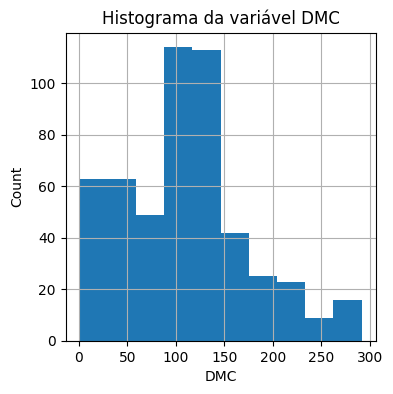

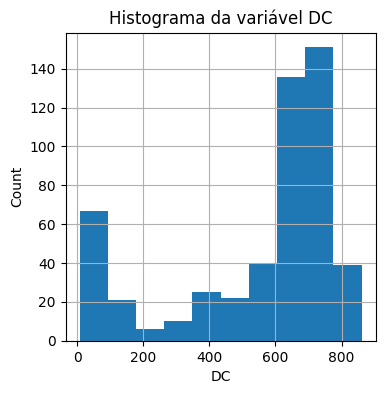

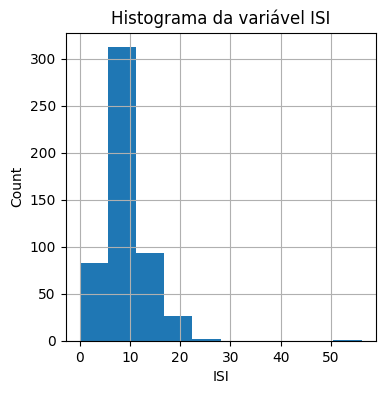

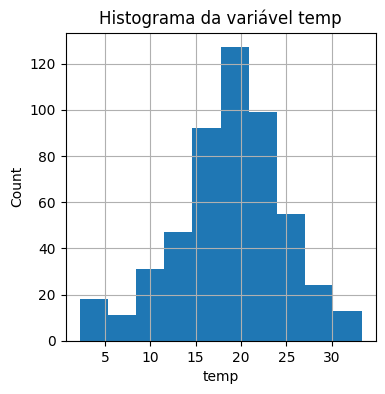

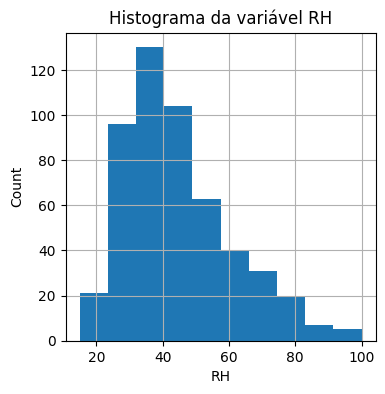

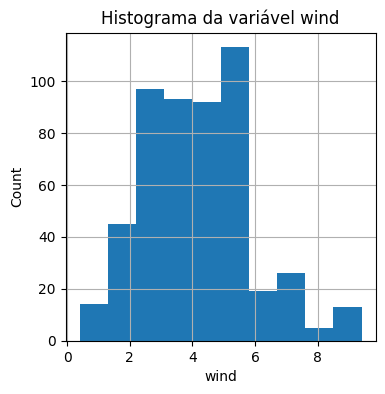

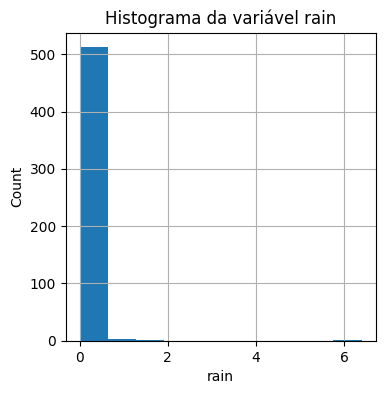

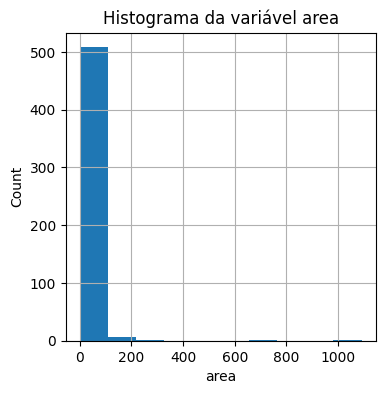

In [15]:
import matplotlib.pyplot as plt

# Iterar sobre as colunas do DataFrame
for column in df.columns:
    # Criar o histograma
    plt.figure(figsize=(4, 4))
    df[column].hist()

    # Adicionar rótulos e título
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Histograma da variável {column}')

    # Exibir o gráfico
    plt.show()

In [16]:
# removendo outliers baseado nos dados do histograma
mask = (df.FFMC<80)|(df.ISI>25)

df = df.loc[~mask]
df.shape

(504, 13)

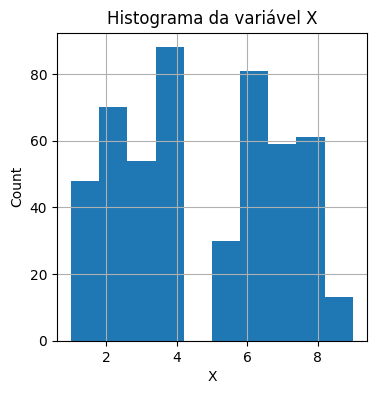

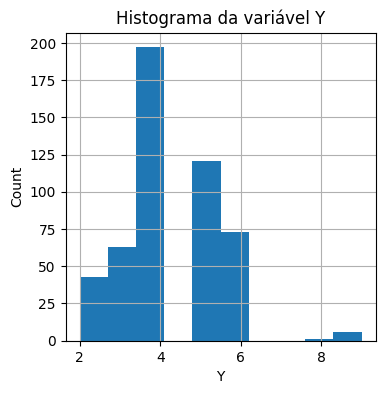

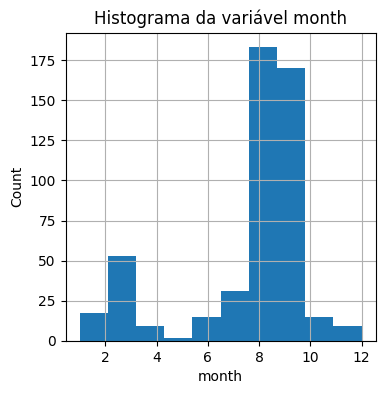

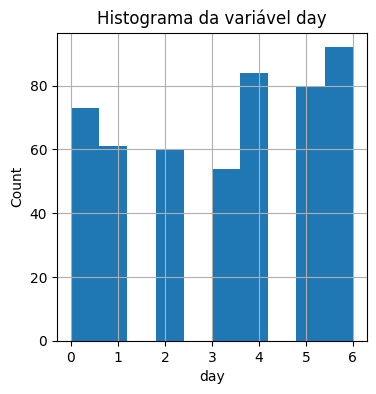

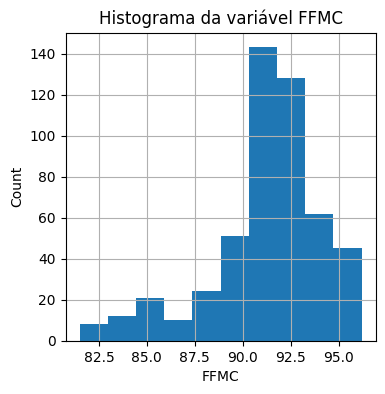

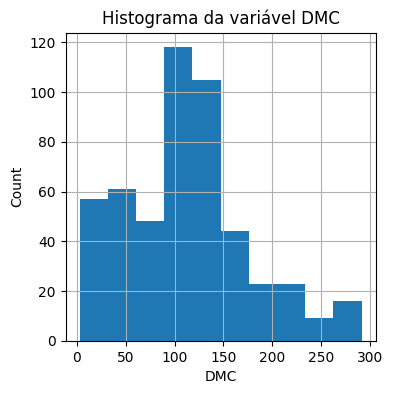

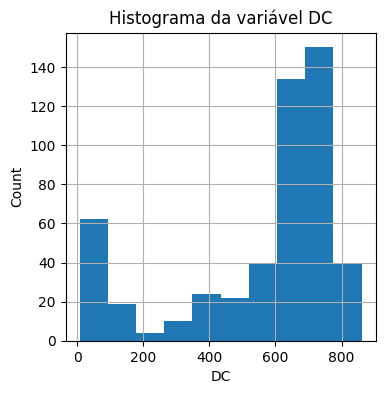

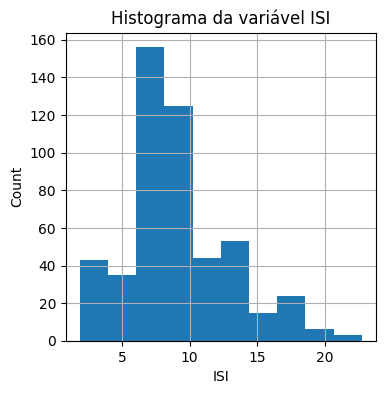

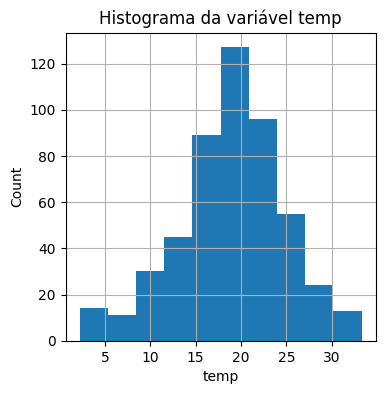

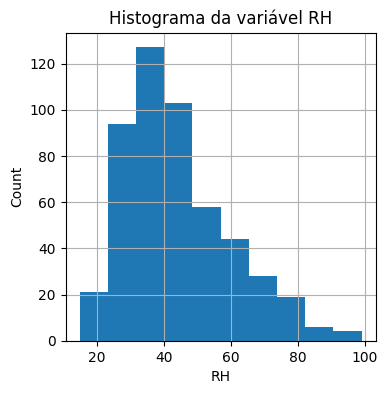

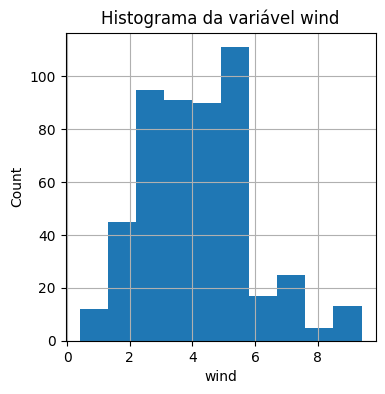

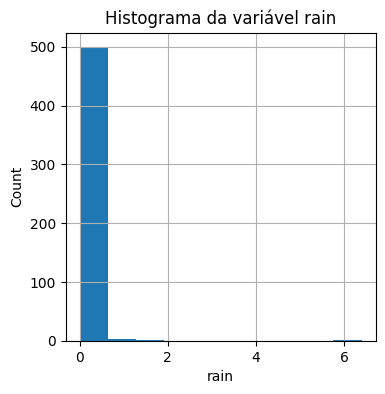

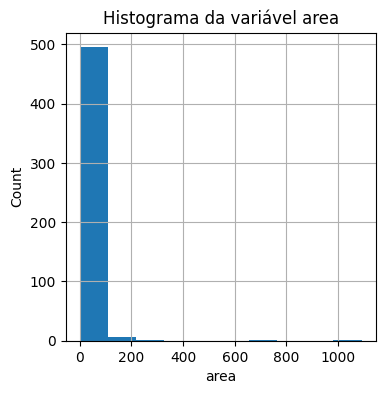

In [17]:
import matplotlib.pyplot as plt

# Iterar sobre as colunas do DataFrame
for column in df.columns:
    # Criar o histograma
    plt.figure(figsize=(4, 4))
    df[column].hist()

    # Adicionar rótulos e título
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Histograma da variável {column}')

    # Exibir o gráfico
    plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504 entries, 0 to 515
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       504 non-null    int64  
 1   Y       504 non-null    int64  
 2   month   504 non-null    int64  
 3   day     504 non-null    int64  
 4   FFMC    504 non-null    float64
 5   DMC     504 non-null    float64
 6   DC      504 non-null    float64
 7   ISI     504 non-null    float64
 8   temp    504 non-null    float64
 9   RH      504 non-null    int64  
 10  wind    504 non-null    float64
 11  rain    504 non-null    float64
 12  area    504 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 55.1 KB


Preparando o modelo

In [19]:
x = df.drop('area', axis=1).values
y = df['area'].values

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [21]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [22]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [23]:
def model_results(model, X_train, y_train):
    model.fit(x_train, y_train)
    predictions = model.predict(x_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    print(f"RMSE: {rmse:.3f}\n")

    print("*****Shapiro-Wilks test for Normality*****")
    residuals = y_train - predictions
    test_results = stats.shapiro(residuals)
    if test_results[1]>0.5:
        print("\nResiduals follow normal distribution!")
    else:
        print("\nResiduals do no follow normal distribution!")

    plt.scatter(np.arange(len(residuals)), residuals)
    plt.title("Residual Plot")
    plt.show()

Regressão Linear

RMSE: 1.371

*****Shapiro-Wilks test for Normality*****

Residuals do no follow normal distribution!


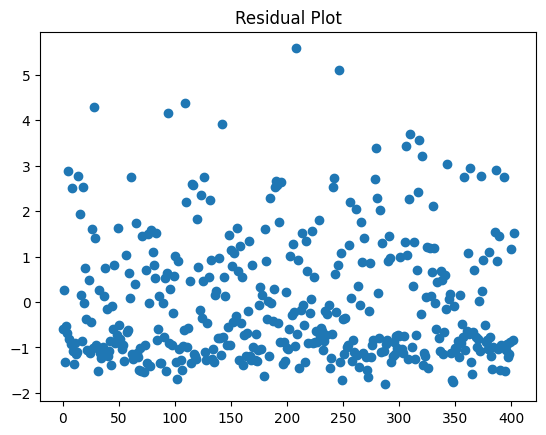

In [24]:
linear_reg = LinearRegression()

model_results(linear_reg, x_train_scaled, y_train_log)

In [29]:
# Treinando o modelo
linear_reg.fit(x_train, y_train)

LinearRegression()

In [31]:
# Fazendo previsões com o conjunto de teste
y_pred = linear_reg.predict(x_test)

In [32]:
# Calculando as métricas
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [33]:
# Exibindo os resultados
print(f'R-squared: {r2:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

R-squared: -0.21
Mean Absolute Error: 17.76
Mean Squared Error: 658.81
Root Mean Squared Error: 25.67
